## 20191603_project_1.ipynb
- **[Project Name]** Implement Perceptron and SVM Algorithm into Python
- **[Author]** 20191603 심규환
- **[Contents]** 
    - **Practice 1** :  Perceptron_mis_yx(), Perceptron_l2()
    - **Practice 2** :  SVM()

----- Perceptron_mis_yx() started -----
err =  13
err =  26
err =  12
err =  11
err =  10
err =  9
err =  3
err =  2
err =  1
err =  0


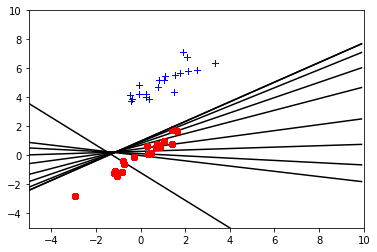

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_sample = 20
x_c1 =  np.loadtxt("x_c1.csv", delimiter=",", encoding='utf-8-sig')
x_c2 =  np.loadtxt("x_c2.csv", delimiter=",", encoding='utf-8-sig')

z_cl =  np.ones((n_sample,1))
x_c1 = np.c_[z_cl, x_c1]
x_c2 = np.c_[z_cl, x_c2]

y1 = np.ones((n_sample,1))*(-1)
y2 = np.ones((n_sample,1))

x = np.r_[x_c1, x_c2]
y = np.r_[y1, y2]
w = np.random.rand(1,3)

# print(w, w[0,1])w

def drawData(x_c1, x_c2):
    plt.plot(x_c1[:,1], x_c1[:,2], 'or')
    plt.plot(x_c2[:,1], x_c2[:,2], '+b')


def drawLine(w, col):
    x = np.arange(-5, 10, step=0.1)
    # y = -w(1)/w(3)-w(2)/w(3)*x;
    y = -w[0,0]/w[0,2] - w[0,1]/w[0,2] *x
    
    plt.plot(x, y, col); 
    
def drawDataHyperplane(x_c1, x_c2, w, col):
    drawData(x_c1, x_c2)
    drawLine(w, col)
def Perceptron_mis_yx(y, x, w, n_epoch, eta):
    n_sample = np.size(y)//2
    x_c1 = x[0:n_sample]
    x_c2 = x[n_sample:n_sample*2]
    yx = np.multiply(np.tile(y, (1,3)),x)
    
    print('----- Perceptron_mis_yx() started -----')
    for e in range(1, n_epoch):
        wyx = np.sum(np.tile(w,(n_sample*2,1)).conj()*yx, axis=1)
        yx_misclassified = yx[wyx<0, :]
        np.sum(yx_misclassified)
        w = w + sum(yx_misclassified);
        err = sum(wyx < 0)
        print('err = ', err)
        plt.xlim([-5, 10])
        plt.ylim([-5, 10])
        drawDataHyperplane(x_c1, x_c2, w, 'k');
        
        if err == 0:
            break
        
    return e

n_epoch = 300;
eta = 0.001;
ret1 = Perceptron_mis_yx(y, x, w, n_epoch, eta); 

----- Perceptron_l2() started -----
err(1) = 263.9803600638699 13
err(2) = 75.0863749600286 16
err(3) = 46.12856459122989 17
err(4) = 40.63600302896732 20
err(5) = 38.62559575787202 22
err(6) = 37.16975491757127 22
err(7) = 35.83812713076261 22
err(8) = 34.56605778130994 22
err(9) = 33.34250169207001 20
err(10) = 32.164326084263365 20
err(11) = 31.029617187835015 19
err(12) = 29.936697652535734 18
err(13) = 28.883980219122584 17
err(14) = 27.869943944387906 17
err(15) = 26.893128477802897 17
err(16) = 25.952131083785325 16
err(17) = 25.04560416345704 16
err(18) = 24.17225294217798 16
err(19) = 23.330833269409798 16
err(20) = 22.520149518743253 16
err(21) = 21.73905258219998 16
err(22) = 20.986437954057102 15
err(23) = 20.26124389981629 13
err(24) = 19.56244970618816 13
err(25) = 18.88907400818323 13
err(26) = 18.240173189606125 13
err(27) = 17.614839853443627 13
err(28) = 17.01220135881963 13
err(29) = 16.431418421362878 13
err(30) = 15.871683773996113 13
err(31) = 15.332220885309134 1

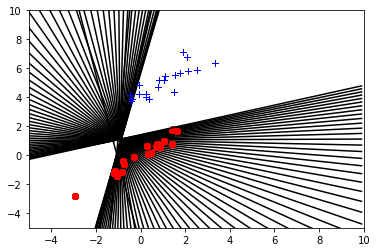

In [17]:
w = np.random.rand(1,3)

def Perceptron_l2(y, x, w, n_epoch, eta):
    n_sample = np.size(y)//2
    x_c1 = x[0:n_sample]
    x_c2 = x[n_sample:n_sample*2]

    print('----- Perceptron_l2() started -----')
    for e in range(1, n_epoch):
        # wx = dot(repmat(w,n_sample*2,1),x,2);
        wx = np.reshape(np.sum(np.tile(w,(n_sample*2,1)).conj()*x, axis=1), (40,1))
        # print(wx)
        # diff = repmat((y - wx),1,3).*x;
        repm = np.tile((y-wx), (1,3))
        diff = np.multiply(repm, x)

        # w = w + eta*sum(diff);
        w = w + eta * sum(diff)

        # err1 = 1/2*sum((y - wx).^2);
        # err2 = sum(y.*wx<0);
        err1 = 1/2 * (np.sum(np.power(y-wx, 2)))
        err2 = np.sum(np.multiply(y, wx)<0)
        print('err({}) = {} {}'.format(e, err1, err2))
        
        plt.xlim([-5, 10])
        plt.ylim([-5, 10])
        drawDataHyperplane(x_c1, x_c2, w, 'k');
        
        if err2 == 0:
            break
        
    ret2 = e;

n_epoch = 300;
eta = 0.001;
ret1 = Perceptron_l2(y, x, w, n_epoch, eta); 

----- SVM() started -----
err(1)=18 -27.834573054552322, w=0.9751248793330829 0.977651490065104 0.654302461090377, |w|=1.5279995670515756, |w23|=1.1763988042392097
err(2)=18 -27.415945590393765, w=0.9563447794296164 0.9706990388730519 0.6479235231215047, |w|=1.5088594543646308, |w23|=1.1670739119195706
err(3)=18 -26.997653028206532, w=0.9375797036060727 0.9637521496419534 0.6415496883030075, |w|=1.4897851889165845, |w23|=1.1577582685954664
err(4)=18 -26.57969510006905, w=0.9188296398431878 0.9568108179222399 0.6351809525523651, |w|=1.4707786002089906, |w23|=1.1484519074729926
err(5)=18 -26.162071538274077, w=0.9000945761313133 0.9498750392679021 0.6288173117903232, |w|=1.4518416056210868, |w23|=1.1391548629714079
err(6)=18 -25.744782075328544, w=0.8813745004704082 0.9429448092364877 0.6224587619408909, |w|=1.4329762153163899, |w23|=1.1298671707696541
err(7)=18 -25.327826443953366, w=0.8626694008700319 0.9360201233890986 0.6161052989313381, |w|=1.4141845374483757, |w23|=1.12058886785502

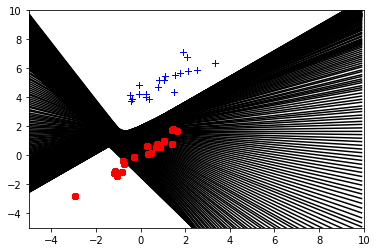

In [7]:
w = np.random.rand(1,3)

def SVM(y, x, w, n_epoch, eta, lamda):
    # yx = repmat(y,1,3).*x; 
    yx = np.multiply((np.tile(y, (1,3))), x)
    print('----- SVM() started -----')

    for e in range(1, n_epoch):
        wyx = np.sum(np.tile(w,(n_sample*2,1)).conj()*yx, axis=1)
        err_idx = wyx<1

        w = w + eta*(-2*lamda*w*(n_sample*2) + sum(yx[err_idx, :]))
        err1 = np.sum(err_idx)
        err2 = np.sum(wyx[err_idx])
        xxx = np.empty((1,2))
        xxx[0,0], xxx[0,1]= np.squeeze(w)[1], np.squeeze(w)[2]
        print('err({})={} {}, w={} {} {}, |w|={}, |w23|={}'.
        format(e, err1, err2, np.squeeze(w)[0], np.squeeze(w)[1], np.squeeze(w)[2], np.sqrt(np.sum(np.power(w,2))), np.sqrt(np.sum(np.power(xxx,2)))))
        
        plt.xlim([-5, 10])
        plt.ylim([-5, 10])
        drawDataHyperplane(x_c1, x_c2, w, 'k')


n_epoch = 300;
eta = 0.001;
lamda = 0.01
ret3 = SVM(y, x, w, n_epoch, eta, lamda); 